In [1]:
import numpy as np
import torch
import torchio as tio
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

import time
from datetime import datetime
from tqdm import tqdm
from dataset import TioDataset
from ControllerClass import Controller
from metrics import (DICE_Metric, DiceLoss, TverskyLoss, get_total_params)
from unet2d import Unet2d

<h3> Set training params

In [2]:
#PATCH_SIZE_TRAIN = (512, 512, 1)
PATCH_SIZE_TRAIN = (512, 512, 1)
PATCH_SIZE_TEST = (512, 512, 1)
OVERLAP_TEST = (32, 32, 0)

<h3> Init datasets

In [3]:
train_settings  = {
    "patch_shape" : PATCH_SIZE_TRAIN,
    "patches_per_volume" : 32,
    "patches_queue_length" : 1440,
    "batch_size" : 16,
    "num_workers": 4,
}

val_settings = {
    "patch_shape" : PATCH_SIZE_TEST,
    "overlap_shape" : OVERLAP_TEST,
    "batch_size" : 4,
    "num_workers": 4,
}


data_dir = '/home/msst/repo/MSRepo/Sandbox/Satelite/data'
dataset = TioDataset(data_dir,
                 train_settings=train_settings,
                 val_settings=val_settings,)

<h3> Init model

In [4]:
channels = 16
depth = 4
model = Unet2d(in_channels=6, out_channels=1, channels=channels, depth=depth)
print("Model params count:", get_total_params(model))

Model params count: 2162689


<h3> Init model controller

In [8]:
Tversky=0.55
controller_config = {
    "loss" : TverskyLoss(beta=Tversky),
    "metric" : DICE_Metric(),
    'device' : 'cuda',
    "model" : model,
    "optimizer_fn" : lambda model: Adam(model.parameters(), lr=0.001),
    "sheduler_fn": None, #lambda optimizer: StepLR(optimizer, step_size=1, gamma=0.9),
    "is2d" : True,
    'verbose':True,
    'stoper': None
}
controller = Controller(controller_config)

<h3> Fit model using training and val data

In [16]:
controller.fit(dataset, n_epochs=30)

Epoch 19/48


100%|███████████████████████████| 16/16 [00:12<00:00,  1.32it/s]


{'mean_loss': 0.17669034004211426}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.34it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8700])}, {'sample': 'ventura', 'metric': tensor([0.7512])}]
Epoch 20/48


100%|███████████████████████████| 16/16 [00:12<00:00,  1.27it/s]


{'mean_loss': 0.16362540051341057}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.34it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8667])}, {'sample': 'ventura', 'metric': tensor([0.7542])}]
Epoch 21/48


100%|███████████████████████████| 16/16 [00:12<00:00,  1.30it/s]


{'mean_loss': 0.16708369180560112}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.33it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8666])}, {'sample': 'ventura', 'metric': tensor([0.7578])}]
Epoch 22/48


100%|███████████████████████████| 16/16 [00:12<00:00,  1.29it/s]


{'mean_loss': 0.1629134826362133}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.43it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8716])}, {'sample': 'ventura', 'metric': tensor([0.7581])}]
Epoch 23/48


100%|███████████████████████████| 16/16 [00:11<00:00,  1.45it/s]


{'mean_loss': 0.158193651586771}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.32it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8665])}, {'sample': 'ventura', 'metric': tensor([0.7562])}]
Epoch 24/48


100%|███████████████████████████| 16/16 [00:12<00:00,  1.32it/s]


{'mean_loss': 0.1550118736922741}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.31it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8628])}, {'sample': 'ventura', 'metric': tensor([0.7554])}]
Epoch 25/48


100%|███████████████████████████| 16/16 [00:12<00:00,  1.32it/s]


{'mean_loss': 0.14577003568410873}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.29it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8475])}, {'sample': 'ventura', 'metric': tensor([0.7569])}]
Epoch 26/48


100%|███████████████████████████| 16/16 [00:12<00:00,  1.31it/s]


{'mean_loss': 0.14989877864718437}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.42it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8615])}, {'sample': 'ventura', 'metric': tensor([0.7599])}]
Epoch 27/48


100%|███████████████████████████| 16/16 [00:11<00:00,  1.44it/s]


{'mean_loss': 0.15127330645918846}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.28it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8642])}, {'sample': 'ventura', 'metric': tensor([0.7616])}]
Epoch 28/48


100%|███████████████████████████| 16/16 [00:11<00:00,  1.45it/s]


{'mean_loss': 0.15300317108631134}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.33it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8648])}, {'sample': 'ventura', 'metric': tensor([0.7630])}]
Epoch 29/48


100%|███████████████████████████| 16/16 [00:12<00:00,  1.29it/s]


{'mean_loss': 0.16182396560907364}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.36it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8532])}, {'sample': 'ventura', 'metric': tensor([0.7624])}]
Epoch 30/48


100%|███████████████████████████| 16/16 [00:10<00:00,  1.48it/s]


{'mean_loss': 0.14829644188284874}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.29it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8642])}, {'sample': 'ventura', 'metric': tensor([0.7624])}]
Epoch 31/48


100%|███████████████████████████| 16/16 [00:10<00:00,  1.46it/s]


{'mean_loss': 0.15422885864973068}


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.36it/s]


[{'sample': 'santa_rosa', 'metric': tensor([0.8668])}, {'sample': 'ventura', 'metric': tensor([0.7639])}]
Epoch 32/48


  6%|█▊                          | 1/16 [00:00<00:14,  1.04it/s]


KeyboardInterrupt: 

<h3> Save/Load Model

In [17]:
model_name = f'Unet2d_{channels}ch_{depth}dpt_{PATCH_SIZE_TRAIN[0]}ps_Tversky{Tversky}'
path_to_check = f"/home/msst/repo/MSRepo/Sandbox/Satelite/output/{model_name}.pth"
controller.save(path_to_check)
controller.load(path_to_checkpoint=path_to_check)

<h3> Plot training curve

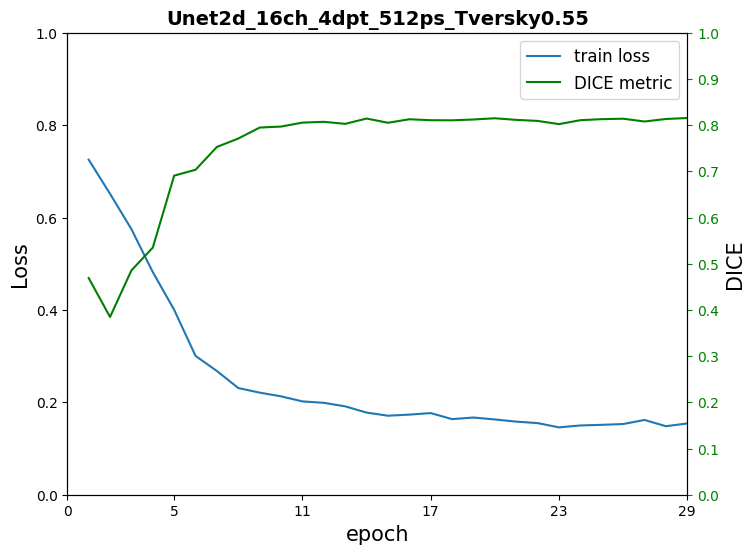

In [18]:
N_ep = len(controller.history['train_loss'])

epochs = np.linspace(1, N_ep, N_ep)
loss_train = controller.history['train_loss']
metrics_val = controller.history['val_loss']

avg_metrics = []
for epoch_metrics in metrics_val:
    metric = []
    for dict_ in epoch_metrics:
        metric.append(dict_['metric'].numpy())
    avg_metrics.append(sum(metric)/len(metric))
    
fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) 

ax.set_title(f"{model_name}", fontsize = 14, fontweight ='bold') 

twin1 = ax.twinx()
p1, = ax.plot(epochs, loss_train, label="train loss")
#p2, = ax.plot(epochs, loss_val, label="validation loss")
p3, = twin1.plot(epochs, avg_metrics, "g-", label="DICE metric")

ax.set_xlabel("epoch", fontsize=fontsize+3)
ax.set_ylabel("Loss", fontsize=fontsize+3)
twin1.set_ylabel("DICE", fontsize=fontsize+3)

twin1.tick_params(axis='y', colors=p3.get_color())


#ax.set_xticklabels(np.linspace(0, 50, 11).astype(int), fontsize=fontsize)
ax.set_xticks(np.linspace(0, N_ep, 6).astype(int))

#ax.set_yticklabels(np.linspace(0, 12, 7).astype(int), fontsize=fontsize)
#ax.set_yticks(np.linspace(0, 12, 7))

#twin1.set_yticklabels(np.round(np.linspace(0, 1, 6),1), fontsize=fontsize)
twin1.set_yticks(np.linspace(0, 1, 11))

ax.set_xlim(0, N_ep)
ax.set_ylim(0, 1)
twin1.set_ylim(0, 1)

ax.legend(handles=[p1, p3], fontsize=fontsize)

#plt.savefig(f'/home/msst/ArticleImages/{model_name}_learning.jpg', dpi=100)

<h3> Test data metrics

In [19]:
test_settings = {
    "patch_shape" : PATCH_SIZE_TEST,
    "overlap_shape" : OVERLAP_TEST,
    "batch_size" : 4,
    "num_workers": 4,
}

data_dir = '/home/msst/repo/MSRepo/Sandbox/Satelite/data'
test_dataset = TioDataset(data_dir,
                          test_settings=test_settings)

controller.fit(test_dataset, n_epochs=1)
print('Done!')

Epoch 33/33


100%|█████████████████████████████| 2/2 [00:00<00:00,  2.42it/s]

{'sample': 'santa_rosa', 'metric': tensor([0.6985])}
{'sample': 'ventura', 'metric': tensor([0.7158])}
new best!
Done!


<h3> Results Visualizing (includind "confusing image")

In [20]:
def get_error_image(seg, gt):
    assert seg.shape==gt.shape
    SIZE = list(seg.shape)
    error_image = torch.zeros((SIZE[0], SIZE[1], 3))
    print(error_image.shape)
    error_image[:, :, 1] = torch.where(seg==gt, 1, 0)
    error_image[:, :, 0] = torch.where(seg<gt, 1, 0)
    error_image[:, :, 2] = torch.where(seg>gt, 1, 0)
    
    return(error_image)

torch.Size([4418, 512, 3])
torch.Size([4418, 512, 1])
torch.Size([4418, 512, 3])


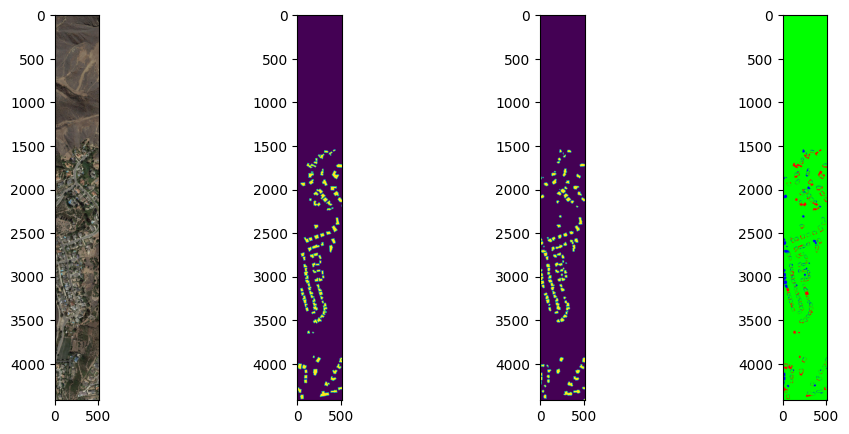

In [21]:
path_to_img = '/home/msst/repo/MSRepo/Sandbox/Satelite/data/test/ventura/img.nii.gz'
path_to_label = '/home/msst/repo/MSRepo/Sandbox/Satelite/data/test/ventura/label.nii.gz'

subject_dict_img = {'img': tio.ScalarImage(path_to_img)}
subject_img = tio.Subject(subject_dict_img)
#subject = tio.transforms.ZNormalization()(subject)

seg = controller.single_predict(subject_img, test_settings)[0]

img = tio.ScalarImage(path_to_img).data[:3, :, :, 0].permute(1, 2, 0)
gt = tio.LabelMap(path_to_label).data[0]

print(img.shape)
print(gt.shape)

fig, ax = plt.subplots(1, 4, figsize=(12, 5))
im0 = ax[0].imshow(img/255)
im1 = ax[1].imshow(gt)
im2 = ax[2].imshow(seg)
im3 = ax[3].imshow(get_error_image(seg[:,:,0], gt[:,:,0]))

torch.Size([2160, 512, 3])
torch.Size([2160, 512, 1])
torch.Size([2160, 512, 3])


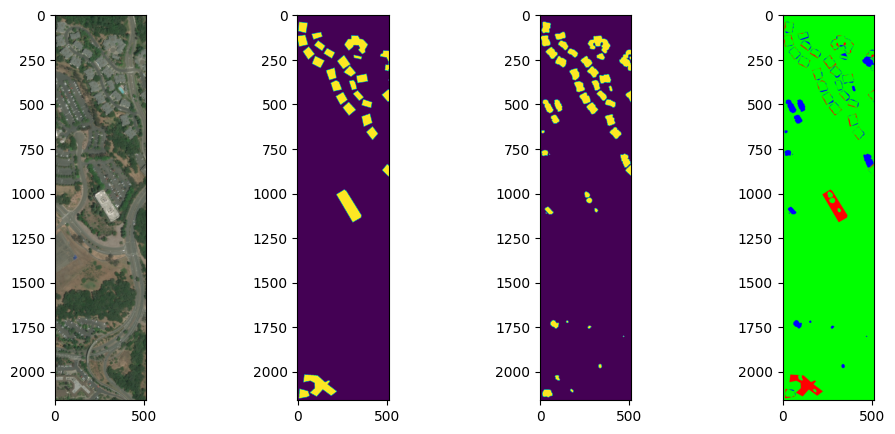

In [22]:
path_to_img = '/home/msst/repo/MSRepo/Sandbox/Satelite/data/test/santa_rosa/img.nii.gz'
path_to_label = '/home/msst/repo/MSRepo/Sandbox/Satelite/data/test/santa_rosa/label.nii.gz'

subject_dict_img = {'img': tio.ScalarImage(path_to_img)}
subject_img = tio.Subject(subject_dict_img)
#subject = tio.transforms.ZNormalization()(subject)

seg = controller.single_predict(subject_img, test_settings)[0]

img = tio.ScalarImage(path_to_img).data[:3, :, :, 0].permute(1, 2, 0)
gt = tio.LabelMap(path_to_label).data[0]

print(img.shape)
print(gt.shape)

fig, ax = plt.subplots(1, 4, figsize=(12, 5))
im0 = ax[0].imshow(img/255)
im1 = ax[1].imshow(gt)
im2 = ax[2].imshow(seg)
im3 = ax[3].imshow(get_error_image(seg[:,:,0], gt[:,:,0]))

<h3> *Calc more metrics

In [28]:
seg_to_save = (seg>0.5).unsqueeze(0)
seg_to_save.shape

torch.Size([1, 2160, 512, 1])

In [31]:
import subprocess
import re

path_to_EvaluateSegmentation = '/home/msst/repo/MSRepo/VesselSegmentation/Inference/EvaluateSegmentation'

GT_path = path_to_label
SEG_path = "/home/msst/repo/MSRepo/Sandbox/Satelite/output/seg.nii.gz"
tio.LabelMap(tensor=seg_to_save).save(SEG_path)

command_output = subprocess.run([f"{path_to_EvaluateSegmentation}",
                                    GT_path, SEG_path], stdout=subprocess.PIPE, text=True)

In [33]:
command_output.stdout.split('\n')

['Similarity:',
 'DICE\t= 0.698490\tDice Coefficient (F1-Measure) ',
 'JACRD\t= 0.536677\tJaccard Coefficient ',
 'AUC\t= 0.833244\tArea under ROC Curve ',
 'KAPPA\t= 0.675390\tCohen Kappa ',
 'RNDIND\t= 0.917843\tRand Index ',
 'ADJRIND\t= 0.641985\tAdjusted Rand Index ',
 'ICCORR\t= 0.698322\tInterclass Correlation ',
 'VOLSMTY\t= 0.985498\tVolumetric Similarity Coefficient ',
 'MUTINF\t= 0.160237\tMutual Information ',
 '',
 'Distance:',
 'HDRFDST\t= 380.348524\tHausdorff Distance (in voxel)',
 'AVGDIST\t= 17.844840\tAverage Hausdorff Distance (in voxel)',
 'MAHLNBS\t= 0.371082\tMahanabolis Distance ',
 'VARINFO\t= 0.420099\tVariation of Information ',
 'GCOERR\t= 0.078386\tGlobal Consistency Error ',
 'PROBDST\t= 0.001693\tProbabilistic Distance ',
 '',
 'Classic Measures:',
 'SNSVTY\t= 0.688506\tSensitivity (Recall, true positive rate) ',
 'SPCFTY\t= 0.977982\tSpecificity (true negative rate) ',
 'PRCISON\t= 0.708768\tPrecision (Confidence) ',
 'FMEASR\t= 0.698490\tF-Measure ',
 '